# Surface computations in SymPy

Here I will compute the curvature for some surfaces in 3D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
from sympy import *
from sympy import init_printing

In [2]:
%matplotlib notebook
x, y, z, t = symbols('x y z t')
u, v, a, b, R = symbols('u v a b R')
k, m, n = symbols('k m n', integer=True)
init_printing()

## Torobius: Torus with the semi-axis following a Möbius strip

We start with an ellipse located in the $yz$ plane.

In [3]:
ellipse = Matrix([[0, a*cos(u), b*sin(u)]]).T

We can generate our surface as a composition of two rotations, one around the $z$-axis, and the other one with respect to an axis that is perpendicular to the ellipse.

We can rotate that ellipse with respect to an axis that is perpendicular to it using the following matrix. Notice that we have a rotation angle that is a multiple of the parameter $v$. If we make $n=0$ we will have a doughnout like shape.

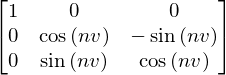

In [4]:
Qx = Matrix([[1, 0, 0],
             [0, cos(n*v), -sin(n*v)],
             [0, sin(n*v), cos(n*v)]])

Qx

And the rotation matrix around $z$ looks like

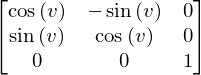

In [5]:
Qz = Matrix([[cos(v), -sin(v), 0],
             [sin(v), cos(v), 0],
             [0, 0, 1]])

Qz

We need to translate the ellipse in the $y$ direction

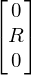

In [6]:
trans = Matrix([[0, R, 0]]).T

trans

The shape is then defined in parametric coordinates as

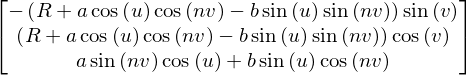

In [7]:
torobius = Qz*(Qx*ellipse + trans)
torobius

In [8]:
x_num = lambdify((u, v, n, a, b, R), torobius[0], "numpy")
y_num = lambdify((u, v, n, a, b, R), torobius[1], "numpy")
z_num = lambdify((u, v, n, a, b, R), torobius[2], "numpy")

In [9]:
u_par, v_par = np.mgrid[0:2*np.pi:50j, 0:2*np.pi:50j]

X = x_num(u_par, v_par, 2, 0.5, 1., 5.)
Y = y_num(u_par, v_par, 2, 0.5, 1., 5.)
Z = z_num(u_par, v_par, 2, 0.5, 1., 5.)

<IPython.core.display.Javascript object>


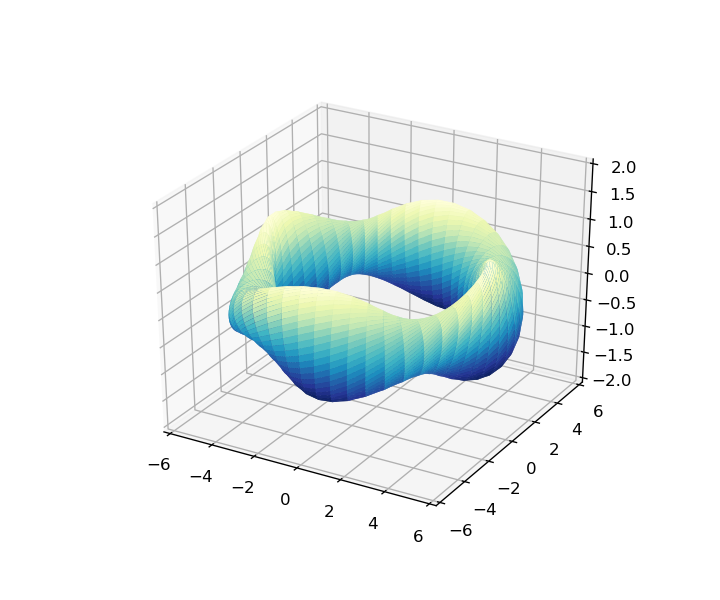

In [10]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="YlGnBu_r")
ax.set_zlim(-2, 2);
plt.show()

### Curvatures: First and second fundamental forms

If we want to compute the the curvatures (Mean and Gaussian), we will need to compute the [first](https://en.wikipedia.org/wiki/First_fundamental_form) and [second](https://en.wikipedia.org/wiki/Second_fundamental_form) fundamental forms of the surface.

The coefficients of the first fundamental form tell us about how the length and area elements are measured on the surface. They are defined as

In [11]:
E = (torobius.diff(u).T * torobius.diff(u))[0]
F = (torobius.diff(u).T * torobius.diff(v))[0]
G = (torobius.diff(v).T * torobius.diff(v))[0]

The second fundamental form gives the information about the curvatures (their eigenvalues are termed the principal curvatures).

In [12]:
def cross(A, B):
    return Matrix([[A[1]*B[2] - A[2]*B[1]],
                   [A[2]*B[0] - A[0]*B[2]],
                   [A[0]*B[1] - A[1]*B[0]]])

In [13]:
n_vec = cross(torobius.diff(u).T, torobius.diff(v))
n_vec = simplify(n_vec/sqrt((n_vec.T * n_vec)[0]))

And the coefficients are defined as

In [14]:
L = (torobius.diff(u, 2).T * n_vec)[0]
M = (torobius.diff(u, 1, v, 1).T * n_vec)[0]
N = (torobius.diff(v, 2).T * n_vec)[0]

The most common measures of curvature are the mean and Gaussian curvatures.

$$K = \kappa_1 \kappa_2$$
and
$$H = \frac{1}{2}(\kappa_1 + \kappa_2)$$.

Where $\kappa_i$ are the principal curvatures.

In [15]:
gauss_curvature = (L*N - M**2)/(E*G - F**2)
mean_curvature = S(1)/2*(L + N)

In [16]:
gauss_num = lambdify((u, v, n, a, b, R), gauss_curvature, "numpy")
mean_num = lambdify((u, v, n, a, b, R), mean_curvature, "numpy")

<IPython.core.display.Javascript object>


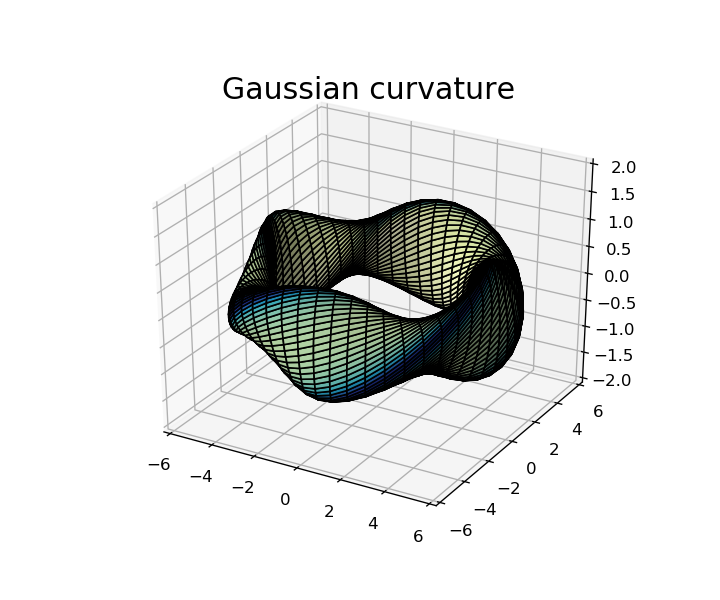

In [18]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
gauss_K = gauss_num(u_par, v_par, 2, 0.5, 1., 5.)
vmax = gauss_K.max()
vmin = gauss_K.min()
FC = (gauss_K - vmin) / (vmax - vmin)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=plt.cm.YlGnBu(FC))
surf.set_edgecolors("k")
ax.set_title("Gaussian curvature", fontsize=18)
ax.set_zlim(-2, 2);

<IPython.core.display.Javascript object>


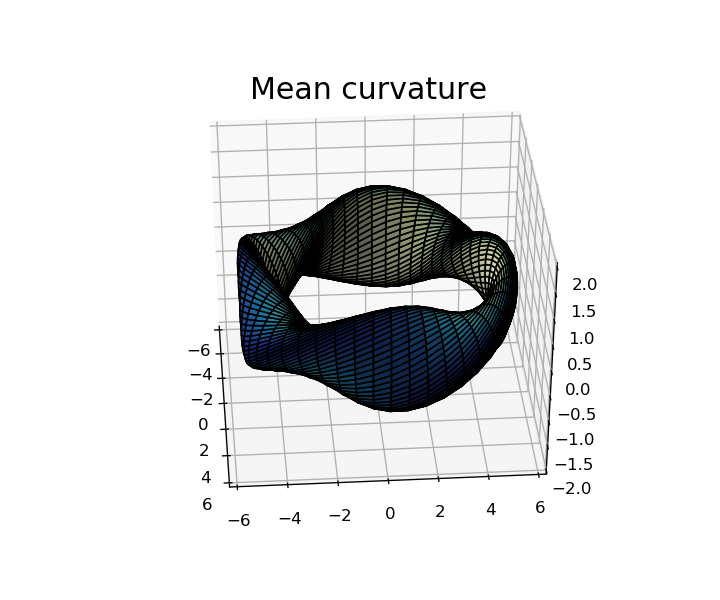

In [19]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
mean_H = mean_num(u_par, v_par, 2, 0.5, 1., 5.)
vmax = mean_H.max()
vmin = mean_H.min()
FC = (mean_H - vmin) / (vmax - vmin)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=plt.cm.YlGnBu(FC))
surf.set_edgecolors("k")
ax.set_title("Mean curvature", fontsize=18)
ax.set_zlim(-2, 2);

In [20]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()